# NY Yellow Taxi Trips

![](https://live.staticflickr.com/8121/8671882197_ae4f16ac5a_b.jpg)

### About the dataset

We will analyse New York Taxi trips that took place in January 2016. Dataset available [here](https://www.kaggle.com/vishnurapps/newyork-taxi-demand/data?select=yellow_tripdata_2016-01.csv).

Team members:
- Lenka Krenkova
- Chowdhury Ashek Bin Helal

There are 19 columns:

Field Name | Description
------------ | -------------
**VendorID** | A code indicating the TPEP provider that provided the record.
| 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
**tpep_pickup_datetime** | The date and time when the meter was engaged.
**tpep_dropoff_datetime** | The date and time when the meter was disengaged.
**Passenger_count** | The number of passengers in the vehicle.
| This is a driver-entered value.
**Trip_distance** | The elapsed trip distance in miles reported by the taximeter.
**Pickup_longitude** | Longitude of location in which the passenger was picked up.
**Pickup_latitude** | Latitude of location in which the passenger was picked up.
**RateCodeID** | The final rate code in effect at the end of the trip.
| 1= Standard rate
|2=JFK
|3=Newark
|4=Nassau or Westchester
|5=Negotiated fare
|6=Group ride
**Store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
|Y= store and forward trip
|N= not a store and forward trip
**Dropoff_longitude** | Longitude of location in which the passenger was dropped off.
**Dropoff_latitude** | Latitude of location in which the passenger was dropped off.
**Payment_type** | A numeric code signifying how the passenger paid for the trip.
|1= Credit card
|2= Cash
|3= No charge
|4= Dispute
|5= Unknown
|6= Voided trip
**Fare_amount** | The time-and-distance fare calculated by the meter.
**Extra** | Miscellaneous extras and surcharges. Currently, this only includes the \\$0.50 and \\$1 rush hour and overnight charges.
**MTA_tax** | \\$0.50 MTA tax that is automatically triggered based on the metered rate in use.
**Improvement_surcharge** | \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
**Tip_amount** | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
**Tolls_amount** |Total amount of all tolls paid in trip.
**Total_amount** | The total amount charged to passengers. Does not include cash tips.

# Plan
- checking to missing data
- checking the duplicate data
- check the popular vendor
- total distance cover
- total time cover
- check the mean of distance,time ,price...(describe)
- Most busiest time of the day.....
- correlations of price and distance, time....
- heat map with correlations
- plot the pickup points and drop off points on map [here](https://www.kaggle.com/yssefunc/mapping-nyc-taxi-with-the-folium-library)
- travel time during the day... to differents airport [here](https://www.r-bloggers.com/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/)
- tipping analysis [here](https://nycdatascience.com/blog/student-works/nyc-taxi-riders-tipping-behavior-analysis/)
- matplotlib [here](https://ramiro.org/notebook/new-york-roads-railways/)

In [1]:
import dask.dataframe as dd
import dask
import dask.array as da
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import plotly.tools as tls
import plotly.express as px
import time#Convert to unix time
from dask.array import from_array as fa

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## Loading the data

As the data was too big to manipulate, we decided to take only a fraction of it so we don't overload the system.

In [3]:
# %%time
# df = dd.read_csv('yellow_tripdata_2016-01.csv')

Wall time: 36.9 ms


When we attempted to work with the full sized data (1,59GB), we realized that it is overloading our memory to the point, where we can no longer save the file, therefore any further work would be lost.

Therefore we decided to to take a random sample of 1/3 of the initial dataset and complete data analysis only on that fraction.

### Creating new dataset, which is fraction of the initial one

In [4]:
# %%time
# df = df.sample(frac=0.33).compute()

# df = dd.from_pandas(df, npartitions=1)

Wall time: 35.7 s


In [5]:
# %%time
# df.to_csv('C:/Users/Lenovo/Documents/Integrify/Python/Dask/project/*')

Wall time: 1min 21s


['C:/Users/Lenovo/Documents/Integrify/Python/Dask/project/0']

In [7]:
%%time
df = dd.read_csv('0')

Wall time: 24.9 ms


In [9]:
%%time
len(df)

Wall time: 8.94 s


3599261

In [8]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,2,2016-01-22 15:22:58,2016-01-22 15:32:13,1,1.45,-73.954300,40.764046,1,N,-73.967842,40.752926,1,8.0,0.0,0.5,2.64,0.0,0.3,11.44
1,0,1,2016-01-05 19:43:57,2016-01-05 19:48:48,2,0.70,-73.962410,40.755157,1,N,-73.958237,40.760284,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30
2,0,1,2016-01-12 15:09:39,2016-01-12 15:31:50,1,5.70,-74.010239,40.720898,1,N,-73.977043,40.752041,1,21.0,0.0,0.5,4.35,0.0,0.3,26.15
3,0,1,2016-01-13 14:48:16,2016-01-13 14:57:32,1,1.10,-73.974113,40.762257,1,N,-73.984535,40.748352,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30
4,0,1,2016-01-20 07:26:13,2016-01-20 07:48:04,1,3.80,-73.996391,40.685993,1,N,-74.009636,40.720921,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36
5,0,1,2016-01-08 09:15:17,2016-01-08 09:46:15,1,5.20,-73.995651,40.687889,1,N,-73.991203,40.739643,1,23.0,0.0,0.5,4.75,0.0,0.3,28.55
6,0,1,2016-01-31 04:28:35,2016-01-31 04:30:52,1,0.60,-73.994904,40.760212,1,N,-73.995689,40.754250,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
7,0,1,2016-01-12 09:46:58,2016-01-12 09:57:51,1,1.20,-74.001167,40.736629,1,N,-74.006012,40.718533,1,8.5,0.0,0.5,1.00,0.0,0.3,10.30
8,0,2,2016-01-20 14:50:46,2016-01-20 15:03:00,1,1.40,-74.000938,40.741741,1,N,-73.983383,40.746414,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
9,0,2,2016-01-14 17:26:48,2016-01-14 17:31:34,5,0.90,-73.986549,40.740360,1,N,-73.978424,40.751190,1,5.5,1.0,0.5,1.46,0.0,0.3,8.76


In [5]:
# Previous length of the whole dataset

#%%time
#len(df)

Wall time: 26.7 s


10906858

## Dealing with missing and duplicate values

In [10]:
%%time
df.isnull().sum().compute()

Wall time: 7.75 s


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [11]:
%%time
df.drop_duplicates(inplace=True).compute()

Wall time: 10.5 s


0    None
dtype: object

There were no missing or duplicate values.

## Checking the data

In [4]:
%%time
df.describe(percentiles=[.25,.50,.75,.90,.95,.99,.999]).compute()

Wall time: 14.9 s


,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06,3.599261e+06
mean,2.027667e+05,1.534798e+00,1.671159e+00,6.888716e+00,-7.281634e+01,4.011367e+01,1.039592e+00,-7.288298e+01,4.015118e+01,1.347612e+00,1.248159e+01,3.128257e-01,4.976485e-01,1.749207e+00,2.928928e-01,2.997205e-01,1.563388e+01
std,1.176064e+05,4.987877e-01,1.325272e+00,4.939958e+03,9.177897e+00,5.055898e+00,5.306784e-01,8.915209e+00,4.911362e+00,4.911300e-01,1.123477e+01,3.661874e-01,4.252791e-02,2.536134e+00,1.729185e+00,1.239716e-02,1.366640e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.219332e+02,0.000000e+00,1.000000e+00,-1.219334e+02,0.000000e+00,1.000000e+00,-4.340000e+02,-3.564000e+01,-5.000000e-01,-2.208000e+02,-5.540000e+00,-3.000000e-01,-4.403400e+02
25%,9.847800e+04,1.000000e+00,1.000000e+00,1.000000e+00,-7.399125e+01,4.073756e+01,1.000000e+00,-7.399087e+01,4.073654e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.380000e+00
50%,1.964030e+05,2.000000e+00,1.000000e+00,1.700000e+00,-7.398083e+01,4.075495e+01,1.000000e+00,-7.397903e+01,4.075510e+01,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,3.036550e+05,2.000000e+00,2.000000e+00,3.190000e+00,-7.396500e+01,4.076896e+01,1.000000e+00,-7.396088e+01,4.077028e+01,2.000000e+00,1.400000e+01,1.000000e+00,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.730000e+01
90%,3.622500e+05,2.000000e+00,4.000000e+00,6.850000e+00,-7.394804e+01,4.078072e+01,1.000000e+00,-7.394171e+01,4.078476e+01,2.000000e+00,2.450000e+01,1.000000e+00,5.000000e-01,4.000000e+00,0.000000e+00,3.000000e-01,2.964000e+01
95%,3.847630e+05,2.000000e+00,5.000000e+00,1.080000e+01,-7.386356e+01,4.078825e+01,1.000000e+00,-7.388204e+01,4.079696e+01,2.000000e+00,3.500000e+01,1.000000e+00,5.000000e-01,6.260000e+00,5.540000e+00,3.000000e-01,4.542000e+01
99%,4.022990e+05,2.000000e+00,6.000000e+00,1.886800e+01,0.000000e+00,4.080553e+01,2.000000e+00,0.000000e+00,4.083765e+01,2.000000e+00,5.200000e+01,1.000000e+00,5.000000e-01,1.167000e+01,5.540000e+00,3.000000e-01,7.001000e+01


We have some irregular data, with trip distance of over 8million miles, which is surely outlier or wrong output. We need to remove these values.

As we want just trips within the NY city, we'll remove all the trips that are longer than 25 miles.

In [10]:
%%time
df = df[(df.trip_distance > 0) & (df.trip_distance <= 25)]

Wall time: 2.99 ms


In [14]:
%%time
df.describe(percentiles=[.25,.50,.75,.90,.95,.99,.999]).compute()

Wall time: 13.3 s


,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06,3.574583e+06
mean,2.027614e+05,1.535530e+00,1.673074e+00,2.889897e+00,-7.288947e+01,4.015397e+01,1.030026e+00,-7.301031e+01,4.022132e+01,1.344981e+00,1.235823e+01,3.136398e-01,4.983898e-01,1.734887e+00,2.851259e-01,2.998081e-01,1.549007e+01
std,1.175949e+05,4.987361e-01,1.327052e+00,3.499385e+00,8.887950e+00,4.896246e+00,3.422575e-01,8.386082e+00,4.619946e+00,4.879618e-01,1.049809e+01,3.662655e-01,3.747544e-02,2.376209e+00,1.648936e+00,1.063068e-02,1.286959e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,-1.008163e+02,0.000000e+00,1.000000e+00,-1.008229e+02,0.000000e+00,1.000000e+00,-1.596600e+02,-3.564000e+01,-5.000000e-01,-2.208000e+02,-5.540000e+00,-3.000000e-01,-2.271000e+02
25%,9.847600e+04,1.000000e+00,1.000000e+00,1.000000e+00,-7.399126e+01,4.073775e+01,1.000000e+00,-7.399088e+01,4.073679e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,1.964030e+05,2.000000e+00,1.000000e+00,1.700000e+00,-7.398088e+01,4.075504e+01,1.000000e+00,-7.397908e+01,4.075520e+01,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,3.036560e+05,2.000000e+00,2.000000e+00,3.200000e+00,-7.396523e+01,4.076900e+01,1.000000e+00,-7.396111e+01,4.077033e+01,2.000000e+00,1.400000e+01,1.000000e+00,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.725000e+01
90%,3.622390e+05,2.000000e+00,4.000000e+00,6.820000e+00,-7.394866e+01,4.078072e+01,1.000000e+00,-7.394266e+01,4.078476e+01,2.000000e+00,2.400000e+01,1.000000e+00,5.000000e-01,4.000000e+00,0.000000e+00,3.000000e-01,2.915000e+01
95%,3.847650e+05,2.000000e+00,5.000000e+00,1.077000e+01,-7.386388e+01,4.078823e+01,1.000000e+00,-7.389047e+01,4.079687e+01,2.000000e+00,3.450000e+01,1.000000e+00,5.000000e-01,6.160000e+00,5.540000e+00,3.000000e-01,4.480000e+01
99%,4.022990e+05,2.000000e+00,6.000000e+00,1.870000e+01,0.000000e+00,4.080537e+01,2.000000e+00,0.000000e+00,4.083685e+01,2.000000e+00,5.200000e+01,1.000000e+00,5.000000e-01,1.167000e+01,5.540000e+00,3.000000e-01,7.000000e+01


The average trip distance after cleaning the data was 2.9 miles, on average customers paid 15.5\\$.

In [40]:
sample = df.head(100)

In [5]:
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.autompg import autompg as df
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

### Plotting distributions of selected variables

In [11]:
%%time
hist, edges = np.histogram(df.trip_distance, density=True, bins=50)

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title='Distribution of trip distances', tools=TOOLS, background_fill_color="#fafafa")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white", fill_color="lightseagreen")

# p.title.text = "Title With Options"
p.title.align = "center"
p.title.text_color = "lightseagreen"
p.title.text_font_size = "20px"
#p.title.background_fill_color = "#fafafa"

p.xaxis.axis_label = 'Trip distances (miles)'
p.yaxis.axis_label = 'Frequency'

show(p)

Wall time: 12.3 s


If we take a closer look into desribe() we can see that we still have some odd values in total amount paid (over 111 thousands \\$), we need to remove those from our dataset as well.

In [12]:
%%time
df = df[(df.total_amount > 0) & (df.total_amount < 120)]

Wall time: 2.99 ms


In [17]:
%%time
df.describe(percentiles=[.25,.50,.75,.90,.95,.99,.999]).compute()

Wall time: 11.8 s


,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06,3.572692e+06
mean,2.027615e+05,1.535390e+00,1.673055e+00,2.888095e+00,-7.289049e+01,4.015453e+01,1.029247e+00,-7.301125e+01,4.022184e+01,1.344409e+00,1.233975e+01,3.139076e-01,4.987576e-01,1.731374e+00,2.819905e-01,2.999949e-01,1.546578e+01
std,1.175939e+05,4.987460e-01,1.327064e+00,3.493434e+00,8.883911e+00,4.894021e+00,3.379841e-01,8.382045e+00,4.617722e+00,4.866724e-01,9.973924e+00,3.656087e-01,2.653072e-02,2.307833e+00,1.321928e+00,1.239609e-03,1.233308e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,-1.008163e+02,0.000000e+00,1.000000e+00,-1.008229e+02,0.000000e+00,1.000000e+00,0.000000e+00,-1.665000e+01,0.000000e+00,-2.380000e+01,0.000000e+00,0.000000e+00,3.000000e-01
25%,9.847600e+04,1.000000e+00,1.000000e+00,1.000000e+00,-7.399126e+01,4.073776e+01,1.000000e+00,-7.399088e+01,4.073680e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,1.964050e+05,2.000000e+00,1.000000e+00,1.700000e+00,-7.398088e+01,4.075504e+01,1.000000e+00,-7.397908e+01,4.075520e+01,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,3.036560e+05,2.000000e+00,2.000000e+00,3.200000e+00,-7.396523e+01,4.076899e+01,1.000000e+00,-7.396111e+01,4.077033e+01,2.000000e+00,1.400000e+01,1.000000e+00,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.725000e+01
90%,3.622388e+05,2.000000e+00,4.000000e+00,6.810000e+00,-7.394868e+01,4.078072e+01,1.000000e+00,-7.394267e+01,4.078475e+01,2.000000e+00,2.400000e+01,1.000000e+00,5.000000e-01,4.000000e+00,0.000000e+00,3.000000e-01,2.915000e+01
95%,3.847640e+05,2.000000e+00,5.000000e+00,1.074000e+01,-7.386390e+01,4.078823e+01,1.000000e+00,-7.389064e+01,4.079684e+01,2.000000e+00,3.450000e+01,1.000000e+00,5.000000e-01,6.150000e+00,5.540000e+00,3.000000e-01,4.479000e+01
99%,4.022990e+05,2.000000e+00,6.000000e+00,1.868000e+01,0.000000e+00,4.080537e+01,2.000000e+00,0.000000e+00,4.083674e+01,2.000000e+00,5.200000e+01,1.000000e+00,5.000000e-01,1.167000e+01,5.540000e+00,3.000000e-01,6.999000e+01


In [13]:
%%time
hist, edges = np.histogram(df.total_amount, density=True, bins=50)

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title='Distribution of total amount paid', tools=TOOLS, background_fill_color="#fafafa")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white", fill_color="darkseagreen")

# configure visual properties on a plot's title attribute
# p.title.text = "Title With Options"
p.title.align = "center"
p.title.text_color = "darkseagreen"
p.title.text_font_size = "20px"
#p.title.background_fill_color = "#fafafa"

p.xaxis.axis_label = 'Total amount ($)'
p.yaxis.axis_label = 'Frequency'

show(p)

Wall time: 11.6 s


#### Checking dtypes of columns

In [59]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

Our datetime variables are as object dtypes, we need to convert them for further analysis.

#### Converting datetime columns and dropping columns

In [14]:
%%time
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'])

Wall time: 29.9 ms


In [15]:
%%time

#dropping unnamed 0
df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

Wall time: 2.7 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-22 15:22:58,2016-01-22 15:32:13,1,1.45,-73.954300,40.764046,1,N,-73.967842,40.752926,1,8.0,0.0,0.5,2.64,0.0,0.3,11.44
1,1,2016-01-05 19:43:57,2016-01-05 19:48:48,2,0.70,-73.962410,40.755157,1,N,-73.958237,40.760284,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30
2,1,2016-01-12 15:09:39,2016-01-12 15:31:50,1,5.70,-74.010239,40.720898,1,N,-73.977043,40.752041,1,21.0,0.0,0.5,4.35,0.0,0.3,26.15
3,1,2016-01-13 14:48:16,2016-01-13 14:57:32,1,1.10,-73.974113,40.762257,1,N,-73.984535,40.748352,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30
4,1,2016-01-20 07:26:13,2016-01-20 07:48:04,1,3.80,-73.996391,40.685993,1,N,-74.009636,40.720921,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36


#### Creating a duration column

In [16]:
%%time

df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime)
df['trip_duration'] = dd.to_timedelta(df['trip_duration'])
df.head()

Wall time: 2.97 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2,2016-01-22 15:22:58,2016-01-22 15:32:13,1,1.45,-73.954300,40.764046,1,N,-73.967842,40.752926,1,8.0,0.0,0.5,2.64,0.0,0.3,11.44,00:09:15
1,1,2016-01-05 19:43:57,2016-01-05 19:48:48,2,0.70,-73.962410,40.755157,1,N,-73.958237,40.760284,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,00:04:51
2,1,2016-01-12 15:09:39,2016-01-12 15:31:50,1,5.70,-74.010239,40.720898,1,N,-73.977043,40.752041,1,21.0,0.0,0.5,4.35,0.0,0.3,26.15,00:22:11
3,1,2016-01-13 14:48:16,2016-01-13 14:57:32,1,1.10,-73.974113,40.762257,1,N,-73.984535,40.748352,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30,00:09:16
4,1,2016-01-20 07:26:13,2016-01-20 07:48:04,1,3.80,-73.996391,40.685993,1,N,-74.009636,40.720921,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36,00:21:51


#### Creating the speed column

In [137]:
sample_wtime = df.head(100)

In [90]:
sample_wtime.dtypes

VendorID                           int64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                    int64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                         int64
store_and_fwd_flag                object
dropoff_longitude                float64
dropoff_latitude                 float64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
trip_duration            timedelta64[ns]
trip_duration_s                   object
dtype: object

In [17]:
%%time
df['trip_minutes'] = df.trip_duration.dt.total_seconds()/60
df.head()

Wall time: 2.87 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_minutes
0,2,2016-01-22 15:22:58,2016-01-22 15:32:13,1,1.45,-73.954300,40.764046,1,N,-73.967842,...,1,8.0,0.0,0.5,2.64,0.0,0.3,11.44,00:09:15,9.250000
1,1,2016-01-05 19:43:57,2016-01-05 19:48:48,2,0.70,-73.962410,40.755157,1,N,-73.958237,...,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,00:04:51,4.850000
2,1,2016-01-12 15:09:39,2016-01-12 15:31:50,1,5.70,-74.010239,40.720898,1,N,-73.977043,...,1,21.0,0.0,0.5,4.35,0.0,0.3,26.15,00:22:11,22.183333
3,1,2016-01-13 14:48:16,2016-01-13 14:57:32,1,1.10,-73.974113,40.762257,1,N,-73.984535,...,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30,00:09:16,9.266667
4,1,2016-01-20 07:26:13,2016-01-20 07:48:04,1,3.80,-73.996391,40.685993,1,N,-74.009636,...,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36,00:21:51,21.850000


In [18]:
%%time
df['avg_speed'] = (df['trip_distance']/df['trip_minutes']*60.0)
df.head()

Wall time: 2.84 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_minutes,avg_speed
0,2,2016-01-22 15:22:58,2016-01-22 15:32:13,1,1.45,-73.954300,40.764046,1,N,-73.967842,...,8.0,0.0,0.5,2.64,0.0,0.3,11.44,00:09:15,9.250000,9.405405
1,1,2016-01-05 19:43:57,2016-01-05 19:48:48,2,0.70,-73.962410,40.755157,1,N,-73.958237,...,5.0,0.5,0.5,0.00,0.0,0.3,6.30,00:04:51,4.850000,8.659794
2,1,2016-01-12 15:09:39,2016-01-12 15:31:50,1,5.70,-74.010239,40.720898,1,N,-73.977043,...,21.0,0.0,0.5,4.35,0.0,0.3,26.15,00:22:11,22.183333,15.416980
3,1,2016-01-13 14:48:16,2016-01-13 14:57:32,1,1.10,-73.974113,40.762257,1,N,-73.984535,...,7.5,0.0,0.5,0.00,0.0,0.3,8.30,00:09:16,9.266667,7.122302
4,1,2016-01-20 07:26:13,2016-01-20 07:48:04,1,3.80,-73.996391,40.685993,1,N,-74.009636,...,17.0,0.0,0.5,3.56,0.0,0.3,21.36,00:21:51,21.850000,10.434783


##### Checking for outliers based on speed

In [171]:
%%time
df.describe(percentiles=[.25,.50,.75,.90,.95,.99,.999]).compute()

Wall time: 48.5 s


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_minutes,avg_speed
count,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3.572576e+06,3572576,3.572576e+06,3.572576e+06
mean,1.535387e+00,1.673054e+00,2.887962e+00,-7.289109e+01,4.015486e+01,1.029234e+00,-7.301143e+01,4.022193e+01,1.344402e+00,1.233937e+01,3.139089e-01,4.987581e-01,1.731337e+00,2.819465e-01,2.999951e-01,1.546531e+01,0 days 00:15:14.897935,1.524830e+01,1.388627e+01
std,4.987462e-01,1.327061e+00,3.493198e+00,8.881458e+00,4.892670e+00,3.379427e-01,8.381289e+00,4.617305e+00,4.866663e-01,9.973175e+00,3.656093e-01,2.652590e-02,2.307718e+00,1.321832e+00,1.208763e-03,1.233219e+01,0 days 01:23:37.219228,8.362032e+01,1.571472e+02
min,1.000000e+00,0.000000e+00,1.000000e-02,-1.008163e+02,0.000000e+00,1.000000e+00,-1.008229e+02,0.000000e+00,1.000000e+00,0.000000e+00,-1.665000e+01,0.000000e+00,-2.380000e+01,0.000000e+00,0.000000e+00,3.000000e-01,0 days 00:00:01,1.666667e-02,4.334477e-04
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399126e+01,4.073776e+01,1.000000e+00,-7.399088e+01,4.073680e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00,0 days 00:06:32,6.533333e+00,8.242991e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398088e+01,4.075504e+01,1.000000e+00,-7.397908e+01,4.075520e+01,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.176000e+01,0 days 00:10:47,1.078333e+01,1.100917e+01
75%,2.000000e+00,2.000000e+00,3.200000e+00,-7.396524e+01,4.076899e+01,1.000000e+00,-7.396111e+01,4.077033e+01,2.000000e+00,1.400000e+01,1.000000e+00,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.725000e+01,0 days 00:17:20,1.733333e+01,1.517241e+01
90%,2.000000e+00,4.000000e+00,6.810000e+00,-7.394869e+01,4.078072e+01,1.000000e+00,-7.394267e+01,4.078475e+01,2.000000e+00,2.400000e+01,1.000000e+00,5.000000e-01,4.000000e+00,0.000000e+00,3.000000e-01,2.915000e+01,0 days 00:25:59,2.598333e+01,2.096292e+01
95%,2.000000e+00,5.000000e+00,1.074000e+01,-7.386391e+01,4.078823e+01,1.000000e+00,-7.389064e+01,4.079685e+01,2.000000e+00,3.450000e+01,1.000000e+00,5.000000e-01,6.150000e+00,5.540000e+00,3.000000e-01,4.479000e+01,0 days 00:33:39,3.365000e+01,2.597797e+01
99%,2.000000e+00,6.000000e+00,1.868000e+01,0.000000e+00,4.080537e+01,2.000000e+00,0.000000e+00,4.083674e+01,2.000000e+00,5.200000e+01,1.000000e+00,5.000000e-01,1.167000e+01,5.540000e+00,3.000000e-01,6.999000e+01,0 days 00:57:15.010000,5.725017e+01,3.678019e+01


There's visibly some incorrect inputs, as we can observe one very long trip duration (that was probably also travelling way to fast). We will remove these values.

In [23]:
%%time
df = df[(df.avg_speed > 0) & (df.avg_speed < 60)]

Wall time: 4.99 ms


In [177]:
speed_sample = df.head(100)

In [24]:
%%time
hist, edges = np.histogram(df.avg_speed, density=True, bins=50)

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title='Distribution of average speed', tools=TOOLS, background_fill_color="#fafafa")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white", fill_color="thistle")

# configure visual properties on a plot's title attribute
# p.title.text = "Title With Options"
p.title.align = "center"
p.title.text_color = "thistle"
p.title.text_font_size = "20px"
#p.title.background_fill_color = "#fafafa"

p.xaxis.axis_label = 'Average speed (MPH)'
p.yaxis.axis_label = 'Frequency'

show(p)

Wall time: 27.2 s


### Correlations

In [25]:
%%time
import seaborn as sns
corr_mat = df.corr().compute()
corr_mat
cm = sns.light_palette("mediumvioletred", as_cmap=True)

s = corr_mat.style.background_gradient(cmap=cm)
s

Wall time: 1min 19s


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_minutes,avg_speed
VendorID,1.000000,0.293954,0.017680,-0.063011,0.063083,0.000780,-0.050082,0.050122,-0.008301,0.013158,-0.014650,0.010242,0.008841,0.009410,-0.003195,0.012885,0.023096,0.027053
passenger_count,0.293954,1.000000,0.014040,-0.018981,0.018971,-0.000046,-0.015777,0.015772,0.012402,0.012409,-0.005542,0.003979,-0.002770,0.010082,0.000474,0.010440,0.009009,0.009450
trip_distance,0.017680,0.014040,1.000000,-0.001220,0.001694,0.312947,-0.001046,0.001244,-0.055897,0.959114,-0.052402,-0.122108,0.579259,0.617992,0.000032,0.948094,0.097606,0.679255
pickup_longitude,-0.063011,-0.018981,-0.001220,1.000000,-0.999936,0.004007,0.917240,-0.917200,0.002016,0.000857,0.001110,-0.000218,-0.000190,-0.001145,-0.003573,0.000567,-0.000174,0.000074
pickup_latitude,0.063083,0.018971,0.001694,-0.999936,1.000000,-0.004026,-0.917209,0.917239,-0.001739,-0.000445,-0.001433,0.000278,0.000457,0.002167,0.003566,-0.000084,0.000193,0.000546
RatecodeID,0.000780,-0.000046,0.312947,0.004007,-0.004026,1.000000,0.003544,-0.003766,-0.004035,0.336661,-0.064504,-0.328448,0.200458,0.312244,-0.006540,0.340517,0.026125,0.191241
dropoff_longitude,-0.050082,-0.015777,-0.001046,0.917240,-0.917209,0.003544,1.000000,-0.999913,0.002922,0.000886,0.001521,0.000681,-0.000681,-0.001168,-0.001378,0.000510,0.000164,0.001109
dropoff_latitude,0.050122,0.015772,0.001244,-0.917200,0.917239,-0.003766,-0.999913,1.000000,-0.002471,-0.000902,-0.001589,0.000285,0.000412,0.001357,0.001381,-0.000554,-0.000196,-0.000219
payment_type,-0.008301,0.012402,-0.055897,0.002016,-0.001739,-0.004035,0.002922,-0.002471,1.000000,-0.062318,-0.024341,-0.002313,-0.532619,-0.044492,-0.000008,-0.155385,-0.003324,-0.033291
fare_amount,0.013158,0.012409,0.959114,0.000857,-0.000445,0.336661,0.000886,-0.000902,-0.062318,1.000000,-0.062231,-0.186297,0.594733,0.609824,-0.002613,0.982737,0.108034,0.553384


Wall time: 3.81 s


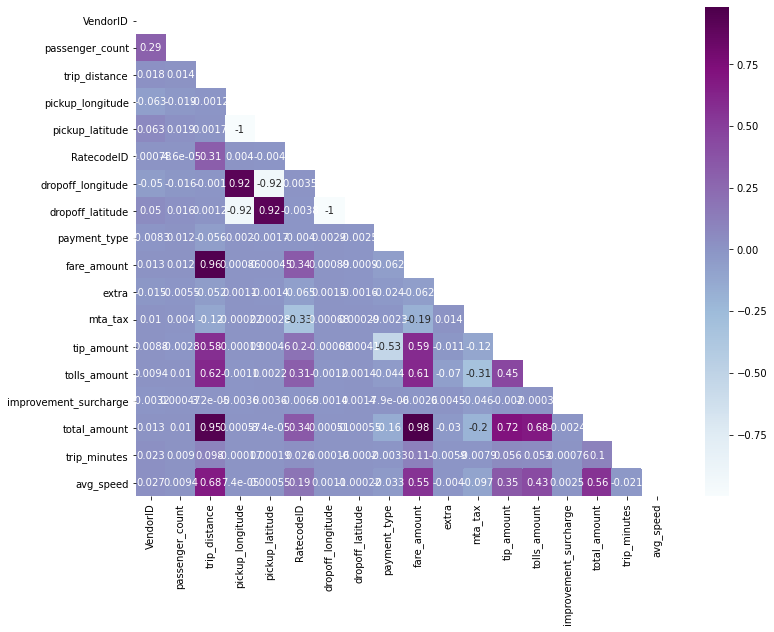

In [27]:
%%time
import seaborn as sns
#corr_mat = df.corr().compute()
#corr_mat = np.tril(corr_mat, k=1)
#ax = sns.heatmap(df, annot=True).compute()
matrix = np.triu(corr_mat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, cmap='BuPu', annot=True, fmt =".2g", mask=matrix)

In [40]:
%%time
fig = px.imshow(corr_mat, color_continuous_scale='Viridis',
               labels=dict(x='Columns',y='Columns', color='Correlation'),
               x=corr_mat.columns, y=corr_mat.columns)

fig.update_layout(
    autosize=False,
    width=850,
    height=850)

fig.show()


Wall time: 62.9 ms


In [23]:
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [42]:
%time
df = df.set_index(df['tpep_pickup_datetime'])

Wall time: 0 ns


In [8]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.0,0.3,20.30
2016-01-01 00:00:01,7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30
2016-01-01 00:00:02,9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2016-01-01 00:00:05,15,2,2016-01-01 00:00:05,2016-01-01 00:07:17,1,0.54,-73.985161,40.768951,1,N,-73.990227,40.761730,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
2016-01-01 00:00:06,17,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.70,-73.982101,40.774696,1,Y,-73.970940,40.796707,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95


### Plotting selected pickup locations

New york bounding box:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004

In [95]:
%%time
import folium
#open street map
#outlier_locations = df[((df.pickup_longitude != 0 | df.pickup_latitude != 0) & (df.pickup_longitude <= -74.15 | df.pickup_latitude <= 40.5774) \
                   #(df.pickup_longitude >= -73.7004 | df.pickup_latitude >= 40.9176))]
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
#sample_locations = outlier_locations.head(100)
sample_locations = df.head(100)
for i,j in sample_locations.iterrows():
    folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

Wall time: 35.5 s


### Resampling the data

In [58]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_minutes,avg_speed
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,19.0,0.5,0.5,0.00,0.0,0.3,20.30,00:18:30,18.500000,17.902703
2016-01-01 00:00:01,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,...,9.0,0.5,0.5,0.00,0.0,0.3,10.30,00:11:54,11.900000,6.050420
2016-01-01 00:00:02,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,...,11.5,0.5,0.5,0.00,0.0,0.3,12.80,00:11:06,11.100000,17.351351
2016-01-01 00:00:05,2,2016-01-01 00:00:05,2016-01-01 00:07:17,1,0.54,-73.985161,40.768951,1,N,-73.990227,...,6.0,0.5,0.5,0.00,0.0,0.3,7.30,00:07:12,7.200000,4.500000
2016-01-01 00:00:06,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.70,-73.982101,40.774696,1,Y,-73.970940,...,7.0,0.5,0.5,1.65,0.0,0.3,9.95,00:04:38,4.633333,22.014388


#### Resampling day wise

In [61]:
%%time
#day-wise
df_date_cal = df['total_amount']
df_date = df_date_cal.resample('D').count().compute().iplot(kind = 'bar',title="Daily total rides",
    xaxis_title="Date",
    yaxis_title="Rides",)

There was a huge blizzard on January 23rd. A travel ban was instituted for New York City and Newark, New Jersey for January 23–24. 

[The biggest snowstorm in New York City on record](https://www.nbcnewyork.com/news/local/nyc-new-york-city-blizzard-biggest-ever-january-23-2016/831660/)
![](https://api.time.com/wp-content/uploads/2018/03/new-york-winter-storm.jpg?w=600&quality=85)

#### According to a weekday

In [78]:
%%time
#weekday
df_week_cal = df['total_amount']
df_week = df_week_cal.groupby(df['tpep_pickup_datetime'].dt.weekday).count().compute().iplot(kind = 'bar',title="Weekly total rides",
    xaxis_title="Weekday",
    yaxis_title="Rides",)

#### Resampling hour wise

In [79]:
%%time
#day-wise
# = df['total_amount']
df_hourly = df.resample('1H').count().compute()
df_hourly.head()

Wall time: 50.7 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_minutes,avg_speed
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,8228,8228,8228,8228,8228,8228,8228,8228,8228,8228,...,8228,8228,8228,8228,8228,8228,8228,8228,8228,8228
2016-01-01 01:00:00,9238,9238,9238,9238,9238,9238,9238,9238,9238,9238,...,9238,9238,9238,9238,9238,9238,9238,9238,9238,9238
2016-01-01 02:00:00,8203,8203,8203,8203,8203,8203,8203,8203,8203,8203,...,8203,8203,8203,8203,8203,8203,8203,8203,8203,8203
2016-01-01 03:00:00,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
2016-01-01 04:00:00,5012,5012,5012,5012,5012,5012,5012,5012,5012,5012,...,5012,5012,5012,5012,5012,5012,5012,5012,5012,5012


In [84]:
%%time
#Hour-wise
df_hourly_cal = df['total_amount']
df_hourly = df_hourly_cal.groupby(df['tpep_pickup_datetime'].dt.hour).count().compute().iplot(kind = 'bar',title="Hourly total rides",
    xaxis_title="Time",
    yaxis_title="Rides")

Wall time: 45.5 s


In [80]:
%%time
df_hourly = df_hourly.drop(columns='tpep_pickup_datetime', axis=1)

Wall time: 2.96 ms


In [81]:
df_hourly = df_hourly.reset_index()

In [82]:
%%time
fig = px.bar(df_hourly, x='tpep_pickup_datetime', y='total_amount',
             title='Daily rides',
            height=600)
fig.show()

#### Resampling with averages

In [47]:
%%time
df_avg_hourly = df.resample('1H').mean()
df_avg_hourly.head()

Wall time: 34.2 s


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_minutes,avg_speed
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1.542173,1.845649,3.003624,-72.933949,40.176223,1.010938,-72.963194,40.197637,1.454667,12.715009,0.497569,0.499088,1.531155,0.101570,0.30000,15.644391,16.996145,12.697274
2016-01-01 01:00:00,1.540701,1.850076,3.154812,-72.845096,40.128588,1.013206,-72.934110,40.182711,1.434185,13.071813,0.497456,0.498809,1.554541,0.103753,0.30000,16.026373,16.760931,12.857726
2016-01-01 02:00:00,1.541022,1.809704,3.444067,-73.007279,40.217100,1.016457,-73.115644,40.283888,1.419968,13.575827,0.497196,0.498903,1.668585,0.151009,0.30000,16.691520,18.498645,13.894178
2016-01-01 03:00:00,1.546671,1.806339,3.557623,-72.920387,40.165546,1.015702,-73.026429,40.233309,1.437191,13.564484,0.496801,0.498619,1.554858,0.142876,0.30000,16.557637,18.376912,14.921382
2016-01-01 04:00:00,1.545291,1.798085,3.760742,-72.808893,40.103598,1.025539,-72.940822,40.186771,1.491620,13.999002,0.495012,0.497506,1.510589,0.177041,0.29994,16.979090,17.840579,16.008961


In [48]:
%%time
h_avg_table = df_avg_hourly.groupby(df_avg_hourly.index.hour).mean().compute()
h_avg_table

Wall time: 48.3 s


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_minutes,avg_speed
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
0,1.521754,1.679198,3.509243,-72.940491,40.175722,1.028602,-73.033404,40.232242,1.343939,13.204014,0.489329,0.499068,1.847254,0.209623,0.299999,16.549286,14.902260,15.566413
1,1.528728,1.667938,3.429497,-72.924507,40.165531,1.026783,-73.024960,40.229888,1.373329,12.854950,0.490830,0.498928,1.663722,0.148680,0.299993,15.957102,13.967598,15.990996
2,1.502496,1.670901,3.372384,-72.923002,40.161316,1.021071,-73.043564,40.238237,1.393663,12.622741,0.494708,0.498447,1.580116,0.112113,0.300000,15.608125,14.101570,16.206928
3,1.490474,1.696082,3.598584,-73.007569,40.207946,1.024412,-73.064249,40.250525,1.431342,13.199292,0.493336,0.498096,1.535799,0.156595,0.299981,16.183100,14.413207,17.005413
4,1.515811,1.692848,4.350513,-72.912497,40.160702,1.058961,-73.061512,40.254784,1.459459,15.135166,0.480908,0.495315,1.802032,0.463208,0.299998,18.676627,15.032385,18.844703
5,1.500665,1.608635,4.585341,-72.933708,40.178858,1.098489,-73.045433,40.246267,1.432542,15.625705,0.432803,0.495215,2.026558,0.684212,0.300000,19.564494,13.874879,19.435324
6,1.501346,1.569032,3.793572,-72.774409,40.093039,1.069682,-72.885053,40.156708,1.392847,13.603099,0.006420,0.497337,1.776083,0.487687,0.299989,16.670615,14.275393,16.910878
7,1.525515,1.597329,3.098908,-72.828561,40.126047,1.041983,-72.949749,40.193221,1.355049,12.336590,0.000406,0.498129,1.661731,0.339346,0.299994,15.136195,13.606715,14.107921
8,1.536446,1.628523,2.715825,-72.879395,40.152866,1.026095,-73.030252,40.233496,1.328247,11.987234,0.000307,0.498710,1.675701,0.272114,0.299997,14.734063,14.407380,12.033587


In [52]:
h_avg_table = h_avg_table.reset_index()

#### Average speed and trip distance by hour of the day

In [88]:
%%time
fig = px.bar(h_avg_table, x='tpep_pickup_datetime', y='avg_speed',
            color='trip_distance',
             title='Average speed and trip distance by hour of the day',
            height=500)


fig.update_layout(
    title={
        'text': "Average speed and trip distance by hour of the day",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

Wall time: 96.7 ms


#### Average speed and tip amount by hour of the day

In [90]:
%%time
fig = px.bar(h_avg_table, x='tpep_pickup_datetime', y='avg_speed',
            color='tip_amount',
             title='Average speed and trip distance by hour of the day',
            height=500)


fig.update_layout(
    title={
        'text': "Average speed and tip amount by hour of the day",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

Wall time: 88.8 ms


#### Trip distance and trip minutes by hour of the day


In [93]:
%%time
fig = px.bar(h_avg_table, x='tpep_pickup_datetime', y='trip_distance',
            color='trip_minutes',
             title='Trip distance and trip minutes by hour of the day',
            height=500)


fig.update_layout(
    title={
        'text': "Trip distance and trip minutes by hour of the day",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

Wall time: 109 ms


In [ ]:
# corr_mat = df_accident.corr().compute()
# figure = ff.create_annotated_heatmap(
#     z=corr_mat.values,
#     x=list(corr_mat.columns),
#     y=list(corr_mat.index),
#     annotation_text=corr_mat.round(2).values,
#     showscale=True)
# figure